In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patheffects
import matplotlib as mpl
import numpy as np
import pandas as pd
import vice

from surp.analysis.apogee_analysis import subgiants
import seaborn as sns
from surp.analysis import plotting_utils as pluto
import surp

from surp._globals import AGB_MODELS
import arya
import scipy

modified solar abundances via mag++22


In [3]:
def cooh_data(ax=None, **params):
    
    ha = subgiants["high_alpha"]
    df = subgiants[~ha]
    
    arya.binnedplot(df, x="MG_H", y="C_MG", binrange=(-0.5, 0.5), binwidth=0.05,
                              cmin=1, stat="median", errorbar="pi",   **params)
    
def coofe_data(o_0=-0.1, w=0.05, ax=None, **kwargs):

        
    filt = subgiants["MG_H"] > o_0 - w
    filt &= subgiants["MG_H"] < o_0 + w
    df = subgiants[filt]
    arya.binnedplot(df, x="MG_FE", y="C_MG", binrange=(-0.1, 0.5),
                              cmin=1, stat="median", errorbar="pi",   **params)

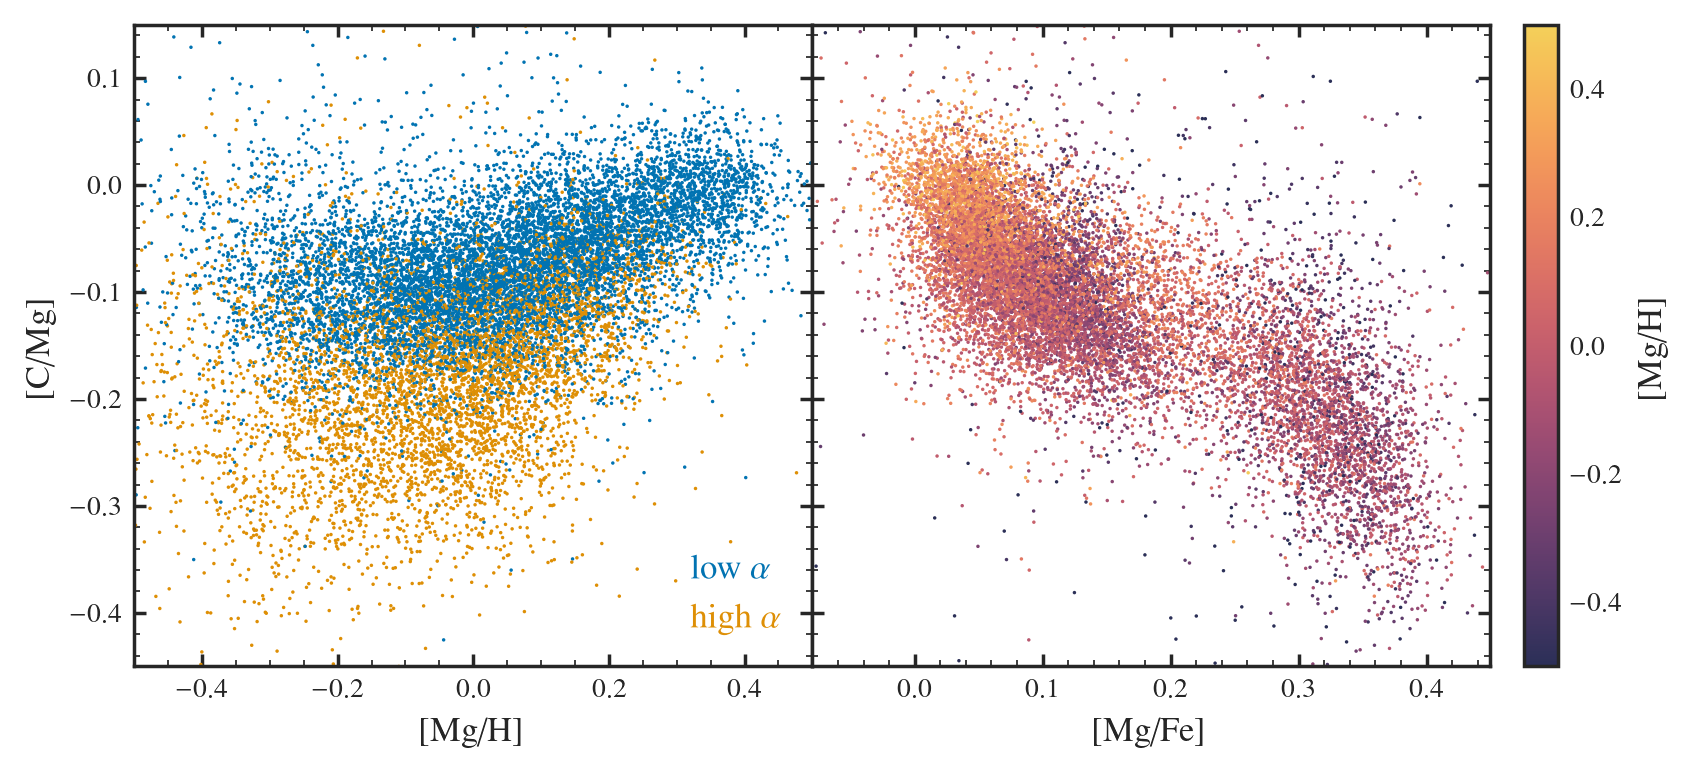

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(7, 10/3), sharey=True, gridspec_kw={"wspace": 0}, dpi=250)


kwargs = dict(
    rasterized=True, ec="none", s=1
)

plt.sca(axs[0])
sns.scatterplot(subgiants, x="MG_H", y="C_MG", hue="high_alpha", **kwargs)
L = arya.Legend(labels=[r"low $\alpha$", r"high $\alpha$"], color_only=True, loc=4)
for text in L.mpl_leg.get_texts():
    text.set_path_effects([mpl.patheffects.Stroke(linewidth=3, foreground='w'),
                       mpl.patheffects.Normal()])
    
plt.ylabel("[C/Mg]")
plt.xlabel("[Mg/H]")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.45, 0.15)

plt.sca(axs[1])
sns.scatterplot(subgiants, x="MG_FE", y="C_MG", hue="MG_H", hue_norm=(-0.5, 0.5), legend=False,  palette=plt.get_cmap(), **kwargs)
plt.xlim(-0.08, 0.45)

plt.xlabel("[Mg/Fe]")

cax = axs[1].inset_axes([1.05, 0., 0.05, 1])

arya.Colorbar(clim=(-0.5, 0.5), label="[Mg/H]", cax=cax)
plt.savefig("figures/subgiants.pdf")

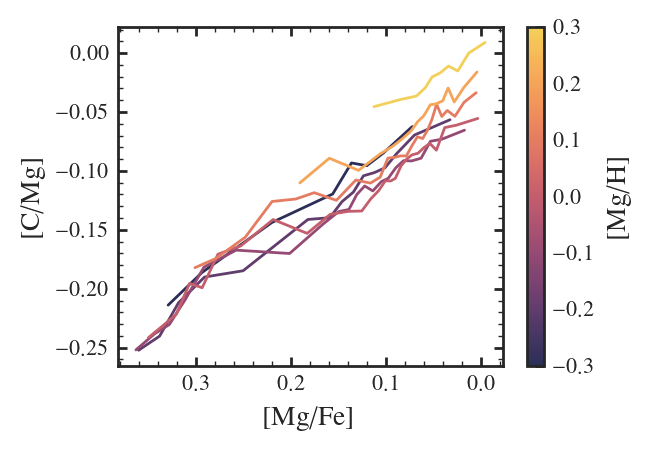

In [5]:
plt.figure(figsize=(10/3, 10/3/2**0.5))

cb = arya.Colorbar(clim=(-0.3, 0.3), label="[Mg/H]")

for MH in (-0.3, -0.2,-0.1,0, 0.1, 0.2,0.3):
    mh0 = MH - 0.05
    mh1 = MH + 0.05
    filt = subgiants.MG_H > mh0
    filt &= subgiants.MG_H < mh1
    df = subgiants[filt]
    
    arya.medianplot(df, x="MG_FE", y="C_MG", binsize=100, color=cb(MH), aes="line", errorbar=None)

plt.gca().invert_xaxis()

plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

plt.tight_layout()
plt.savefig("figures/apogee_caafe_binned.pdf")

(-0.5, 0.5)

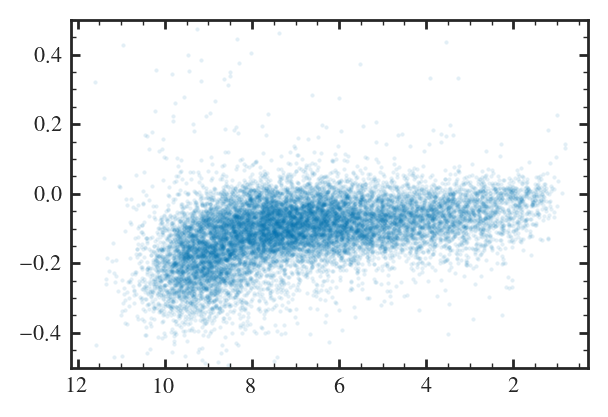

In [14]:
plt.scatter(subgiants.age, subgiants.C_MG, s=0.3, alpha=0.1)
plt.gca().invert_xaxis()
plt.ylim(-0.5, 0.5)

plt.scatter(fiducial.stars.age, fiducial.stars[""])